In [57]:
#Linear Algebra
import numpy as np
#Useful linear algebra, Fourier transform, and random number capabilities

#Data Visualization
import seaborn as sns
#Statistical Data Visualization 

#Data Processing
import pandas as pd
#Everything lol. Object Creation, Viewing Data, Selection, Missing Data, Operations, Plotting, Grouping 

#Rest of imports
from matplotlib import style
import matplotlib.pyplot as plt
#Plotting Library 
from IPython.display import display
#Displaying Objects in different formats 

from sklearn.model_selection import train_test_split
#Splits the training and testing data 

#Statistical Models
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
#Machine Learning Software For Python 


In [58]:
#Get Data
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
# Its common in ML to label the testing and training with a _ df

In [59]:
train_df.info()
#There are 891 responses, 11 features, and 1 target variable
#Two variables are floats, 5 are integers, and 5 are objects 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [60]:
train_df.describe()
#38% of the training-set survived the titanic shipwreck 
#Ages range from 0.4 and 80
#Some people have eight sibilings lol
#Ticket-Class = Socio-Economic Status 
#SibSp = # of spouses/sibilings 
#Parch= # of parents/ children onboard

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
train_df.head(5)
#Does the first five rows
#Lots of features need to be converted to numeric values -> from object 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


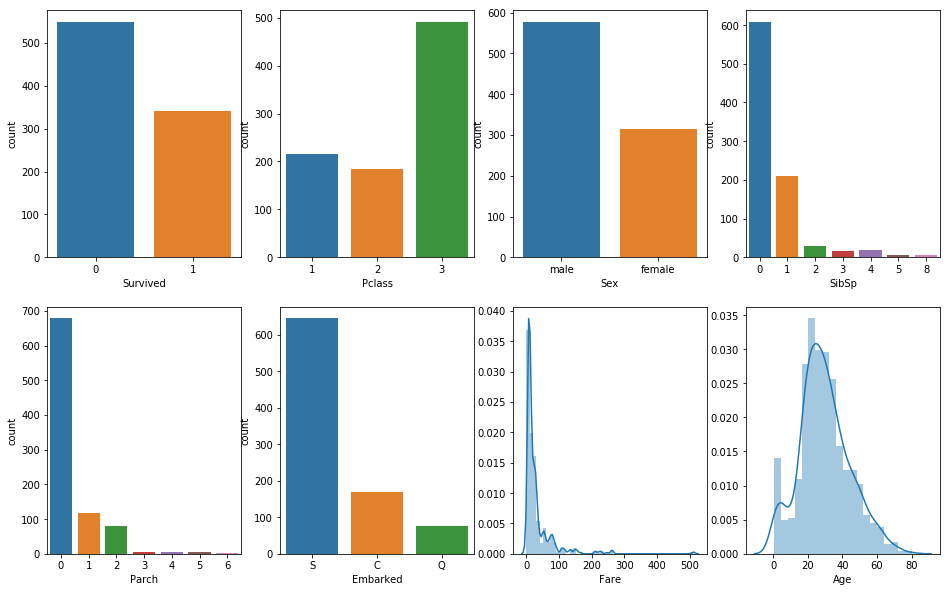

In [40]:
#Lets do some univariate analysis
train_df.Survived.value_counts(normalize=True)
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=train_df,ax=axes[0,0])
sns.countplot('Pclass',data=train_df,ax=axes[0,1])
sns.countplot('Sex',data=train_df,ax=axes[0,2])
sns.countplot('SibSp',data=train_df,ax=axes[0,3])
sns.countplot('Parch',data=train_df,ax=axes[1,0])
sns.countplot('Embarked',data=train_df,ax=axes[1,1])
sns.distplot(train_df['Fare'], kde=True,ax=axes[1,2])
sns.distplot(train_df['Age'].dropna(),kde=True,ax=axes[1,3])
#More people survived than died 
#Many people don't have any sibilings 
#Many people live in the bottom of the boat 

In [63]:
Exploratory = pd.DataFrame(train_df.dtypes)
Exploratory['Missing'] = train_df.isnull().sum()
Exploratory['Unique']=train_df.nunique()
Exploratory
#It seems like we have 3 features that have missing values 
#Embarked has almost no missing values, while age has a lot of missing values, Cabin has so many missing values that
#one would consider dropping it from the dataset.

,0,Missing,Unique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [ ]:
#Let's first deal with missing values from top to bottom

In [ ]:
#Age is the hardest with 177 missing values. Our imputation technqiue will be difficult here.
#In order to understand what imputation we're gonna use we should produce some visualizations.

In [ ]:
#Age
#An array will be created that contains random numbers computed by the mean age with regards to the SD and is_null
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    train_df["Age"].isnull().sum()

In [ ]:
#Therefore we’re going to extract these and create a new feature, that contains a persons deck. 
#Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [ ]:
#Embarked only has two missing values 
#Fill embarked with the most common one 
train_df['Embarked'].describe()

In [ ]:
#Let's now deal with floats that needed to be converted into Int64's 

In [ ]:
#Coverting Fair From Float to Int64
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
#What features are highly predictive of survival rate?

In [ ]:
#How to the fuck is PassengerID feature going to contribute toward survival rate?
train_df = train_df.drop(['PassengerId'], axis=1)

In [43]:
train_df['Name_len']=train_df.Name.str.len()
train_df['Ticket_First']=train_df.Ticket.str[0]
train_df['FamilyCount']=train_df.SibSp+train_df.Parch
train_df['Cabin_First']=train_df.Cabin.str[0]
# Regular expression to get the title of the Name
train_df['title'] = train_df.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
train_df.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Col.,2
7,Major.,2
8,Mlle.,2
9,Mme.,1
